In [1]:
%matplotlib inline

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [4]:
mydata=pd.read_csv(r"D:\Nihal Kumar\Study_Notes\Part_1_GL\Practice\Projects\K-means Clustering\Dataset.csv")

In [5]:
mydata.head()

,id,simplicity,fatalism,depression,adjsimp,adjfatal,adjdep
0,1,0.92983,0.35589,0.59870,0.75934,0.10673,0.41865
1,2,0.91097,1.18439,0.72787,0.72717,0.99915,0.51688
2,3,0.53366,-0.05837,0.53411,0.62176,0.03811,0.70699
3,4,0.74118,0.35589,0.56641,0.83522,0.42218,0.65639
4,5,0.53366,0.77014,0.50182,0.47697,0.81423,0.53518


In [6]:
mydata.drop('id',axis=1,inplace=True)

In [7]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   simplicity  82 non-null     float64
 1   fatalism    82 non-null     float64
 2   depression  82 non-null     float64
 3   adjsimp     82 non-null     float64
 4   adjfatal    82 non-null     float64
 5   adjdep      82 non-null     float64
dtypes: float64(6)
memory usage: 4.0 KB


In [8]:
mydata.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
simplicity,82.0,1.000000,0.500000,0.25068,0.656282,0.882665,1.26940,2.85408
fatalism,82.0,1.000000,0.500001,-0.05837,0.563010,0.977270,1.39152,2.22003
depression,82.0,1.000001,0.500000,0.46953,0.566410,0.824750,1.37373,2.24565
adjsimp,82.0,1.000000,0.499999,0.23569,0.697958,0.968490,1.20179,2.94977
adjfatal,82.0,1.000000,0.500000,0.03012,0.731598,0.924290,1.29912,2.24931
adjdep,82.0,1.000000,0.500000,0.23454,0.596565,0.967845,1.26175,2.78763


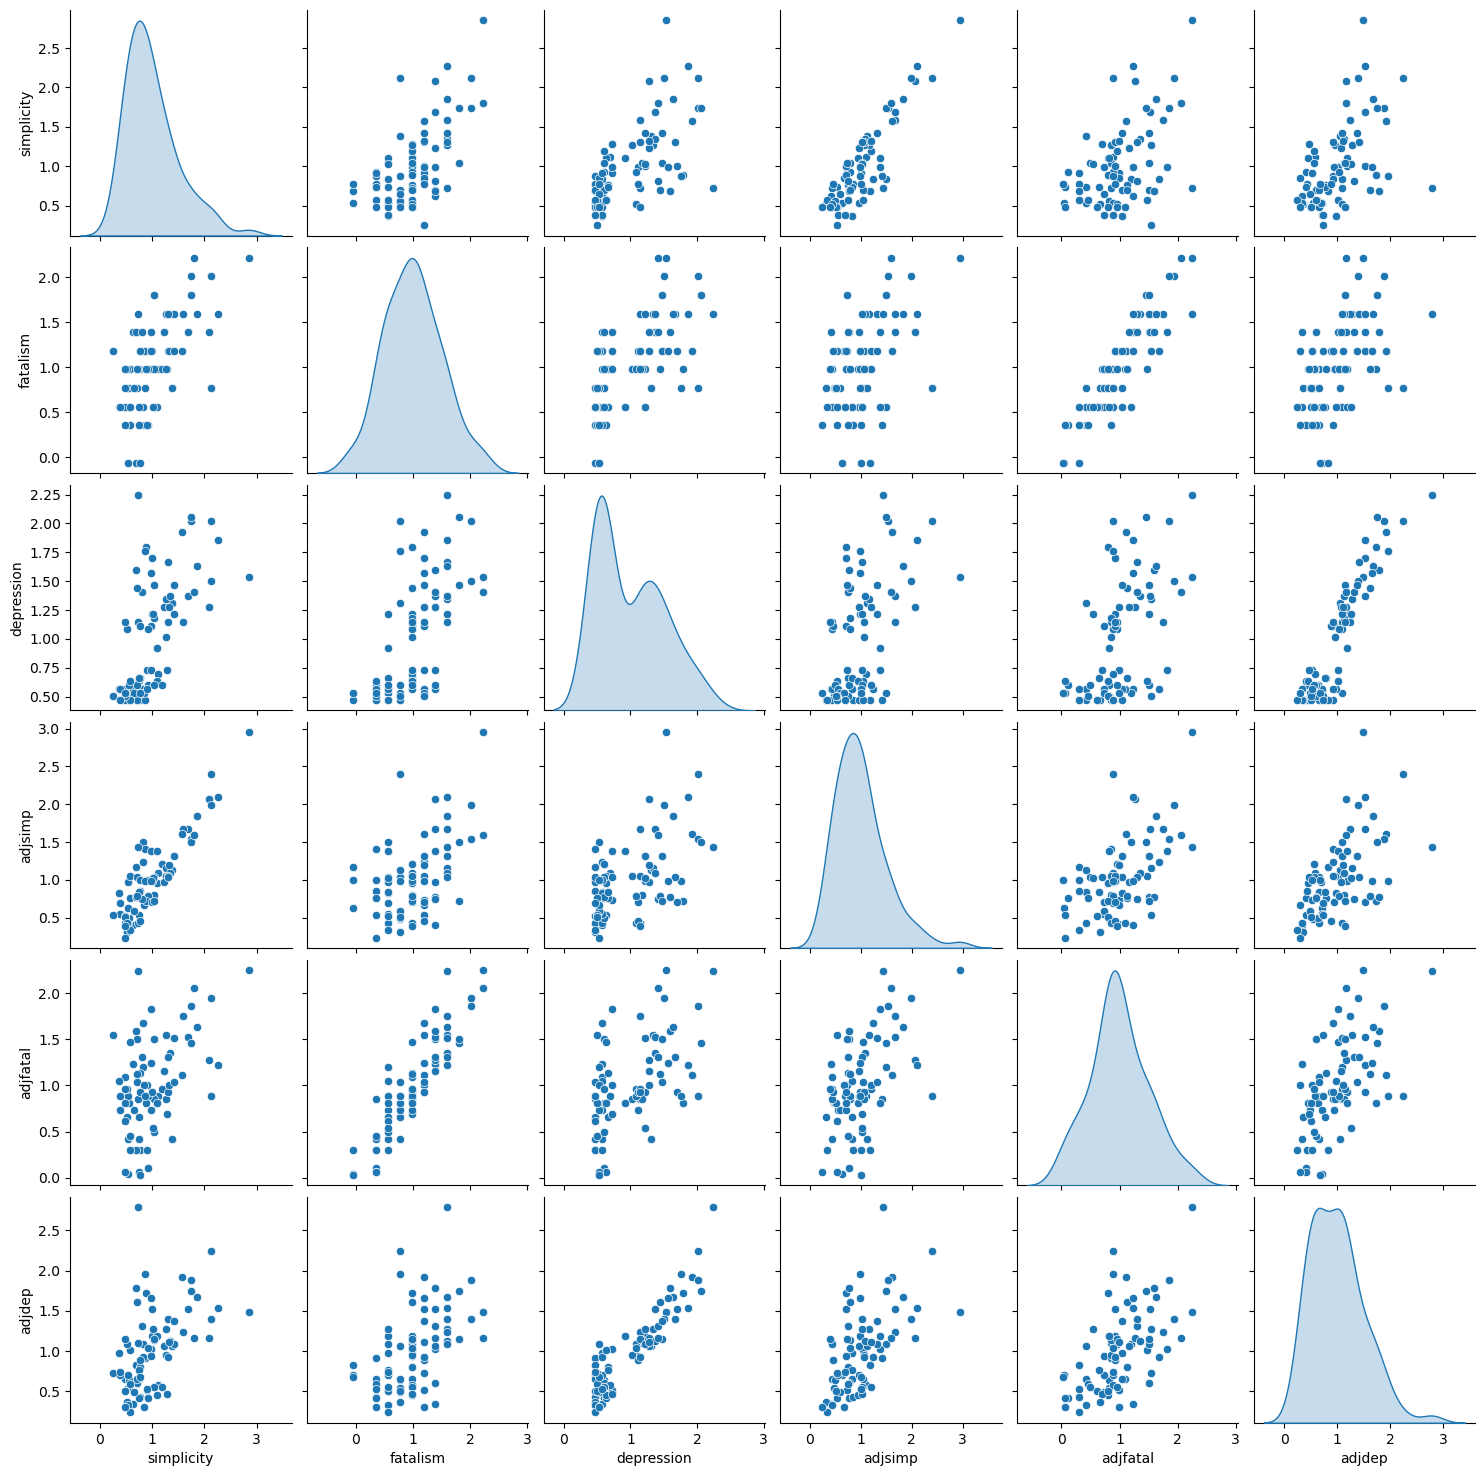

In [9]:
import seaborn as sns
sns.pairplot(mydata,diag_kind='kde')

In [10]:
#scale the data
from scipy.stats import zscore
mydata_z = mydata.apply(zscore)

C:\Users\uie72014\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\uie72014\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\uie72014\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\uie72014\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.p

Text(0.5, 1.0, 'Selecting k withthe Elbow Method')

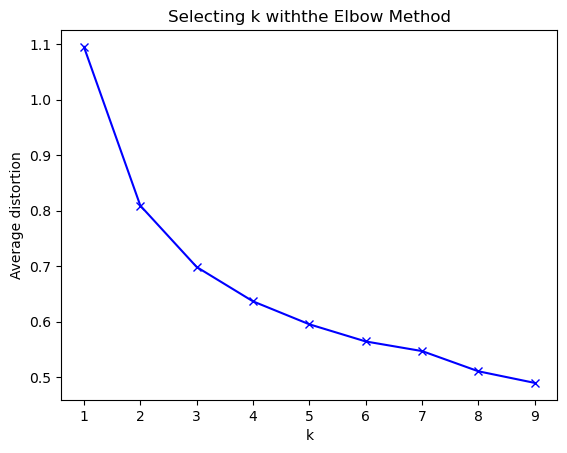

In [11]:
#finding optimal number of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions = []
for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(mydata)
    prediction=model.predict(mydata)
    meanDistortions.append(sum(np.min(cdist(mydata,model.cluster_centers_,'euclidean'),axis=1))/mydata.shape[0])
plt.plot(clusters,meanDistortions,'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k withthe Elbow Method')

In [12]:
#set the value of k=3
kmeans=KMeans(n_clusters=3,n_init = 15,random_state=2345)
kmeans.fit(mydata_z)

C:\Users\uie72014\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, n_init=15, random_state=2345)

In [13]:
centroids = kmeans.cluster_centers_

In [14]:
centroids

array([[-0.00240129,  0.30593064,  0.47588456, -0.15570731,  0.21543758,
         0.41698529],
       [-0.60393647, -0.72164273, -0.90062454, -0.48447657, -0.63244733,
        -0.83635699],
       [ 1.72480697,  1.30084619,  1.39190785,  1.7621744 ,  1.26973449,
         1.35397533]])

In [15]:
#calculate centroids for the column to profile
centroid_df = pd.DataFrame(centroids,columns=list(mydata_z))

In [16]:
print(centroid_df)

   simplicity  fatalism  depression   adjsimp  adjfatal    adjdep
0   -0.002401  0.305931    0.475885 -0.155707  0.215438  0.416985
1   -0.603936 -0.721643   -0.900625 -0.484477 -0.632447 -0.836357
2    1.724807  1.300846    1.391908  1.762174  1.269734  1.353975


In [17]:
#new DF for labels and converting to categorical variable
df_labels = pd.DataFrame(kmeans.labels_,columns=list(['labels']))
df_labels['labels'] = df_labels['labels'].astype('category')

In [18]:
#join label DF with DF
df_labeled = mydata.join(df_labels)

In [19]:
df_analysis = (df_labeled.groupby(['labels'],axis=0)).head(4177)
df_analysis

,simplicity,fatalism,depression,adjsimp,adjfatal,adjdep,labels
0,0.92983,0.35589,0.59870,0.75934,0.10673,0.41865,1
1,0.91097,1.18439,0.72787,0.72717,0.99915,0.51688,1
2,0.53366,-0.05837,0.53411,0.62176,0.03811,0.70699,1
3,0.74118,0.35589,0.56641,0.83522,0.42218,0.65639,1
4,0.53366,0.77014,0.50182,0.47697,0.81423,0.53518,1
...,...,...,...,...,...,...,...
77,1.04302,1.80577,1.47061,0.72117,1.50039,1.14913,0
78,1.79763,2.22003,1.40603,1.59752,2.05016,1.16443,2
79,2.11834,0.77014,2.01960,2.39515,0.88910,2.24452,2
80,1.42033,1.18439,1.47061,1.31493,1.04058,1.37153,0


In [20]:
df_labeled['labels'].value_counts()

1    37
0    32
2    13
Name: labels, dtype: int64

In [21]:
from mpl_toolkits.mplot3d import Axes3D

C:\Users\uie72014\AppData\Local\Temp\ipykernel_25960\673099289.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig,rect=[0,0,.95,1],elev=20,azim=60)
C:\Users\uie72014\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\uie72014\AppData\Local\Temp\ipykernel_25960\673099289.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not mo

Text(0.5, 0.92, '3D plot of KMeansClustering')

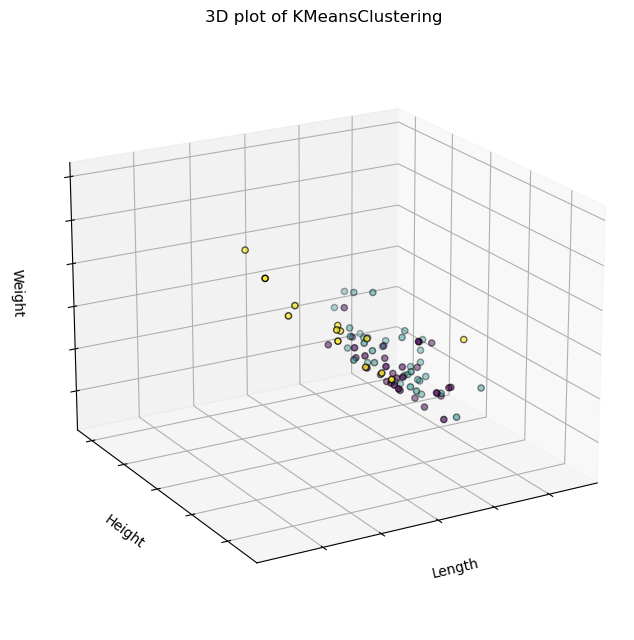

In [22]:
#3D plots of clusters
fig = plt.figure(figsize=(8,6))
ax = Axes3D(fig,rect=[0,0,.95,1],elev=20,azim=60)
kmeans.fit(mydata_z)
labels=kmeans.labels_
ax.scatter(mydata_z.iloc[:,0],mydata_z.iloc[:,1],mydata_z.iloc[:,3],c=labels.astype(np.float),edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Length')
ax.set_ylabel('Height')
ax.set_zlabel('Weight')
ax.set_title('3D plot of KMeansClustering')

In [23]:
#with k=2
final_model = KMeans(2)
final_model.fit(mydata)
prediction = final_model.predict(mydata)
#append the prediction
mydata['GROUP'] = prediction
print('Groups Assigned:\n')
mydata[['depression','GROUP']]

C:\Users\uie72014\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Groups Assigned:



,depression,GROUP
0,0.59870,1
1,0.72787,1
2,0.53411,1
3,0.56641,1
4,0.50182,1
...,...,...
77,1.47061,0
78,1.40603,0
79,2.01960,0
80,1.47061,0


array([[<AxesSubplot:title={'center':'adjdep'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'adjfatal'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'adjsimp'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'depression'}, xlabel='[GROUP]'>],
       [<AxesSubplot:title={'center':'fatalism'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'simplicity'}, xlabel='[GROUP]'>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

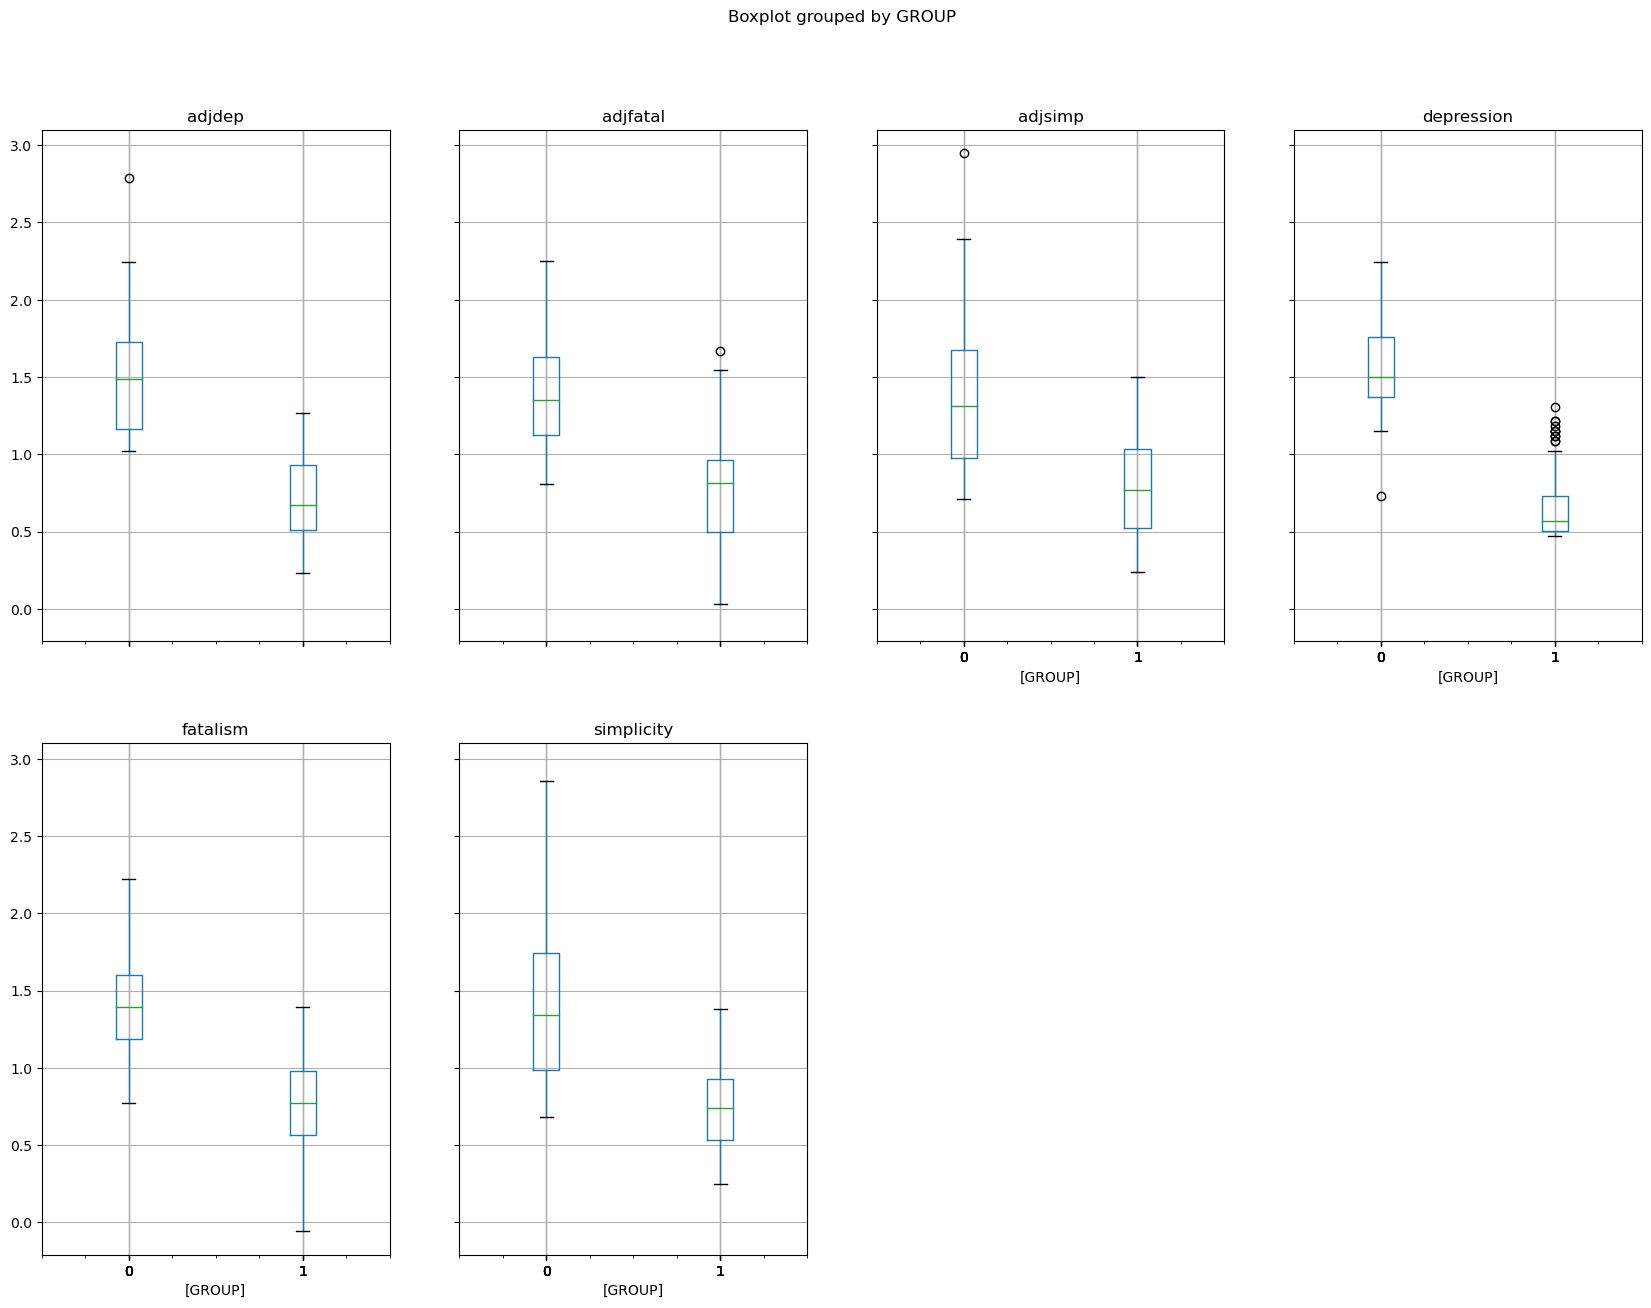

In [24]:
mydata.boxplot(by='GROUP',layout=(2,4),figsize=(20,15))

In [25]:
mydata['simplicity'].corr(mydata['depression'])

0.6432667885861316

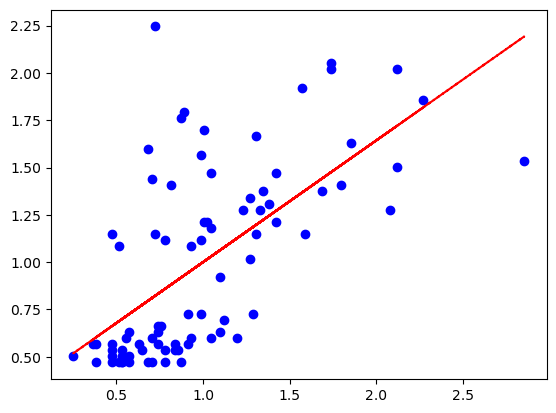

In [26]:
%matplotlib inline
import pandas as pd
plt.plot(mydata['simplicity'],mydata['depression'],'bo')
z=np.polyfit(mydata['simplicity'],mydata['depression'],1)
p=np.poly1d(z)
plt.plot(mydata['simplicity'],p(mydata['simplicity']),'r--')